<a href="https://colab.research.google.com/github/TishaJhabak1014/MLnow_2.0/blob/main/3.1_UnivariateLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> This notebook was created for code illustration of the `ML.now()` course


[Link to Download the dataset](https://archive.ics.uci.edu/ml/datasets/Student+Performance)

**Date Created**: June 6, 2021

**Topic**: `Univariate Linear Regression`

**Author**:
 [Tisha Jhabak](https://github.com/TishaJhabak1014)

[Assessment Repository](https://github.com/TishaJhabak1014/MLnow_2.0)


## Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd "/content/drive/MyDrive/ML LIVE SESSION/03_LinearRegression/student"

/content/drive/MyDrive/ML LIVE SESSION/03_LinearRegression/student


In [5]:
ls

cleanedMathData.csv  student-merge.R  student.txt
student-mat.csv      student-por.csv


In [6]:
import os

In [7]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [8]:
mathData = pd.read_csv('student-mat.csv', sep=';') #load the csv file as dataframe

In [9]:
mathData.head(10) #print the first ten rows of the dataframe

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


We are just going to consider the columns `G1` and `G3` for univariate linear regression

$G3_i = G1_i  \cdot \theta_1 + \theta_0$

In [10]:
uniMathData = mathData[['G1', 'G3']]
uniMathData.head(5)

,G1,G3
0,5,6
1,5,6
2,7,10
3,15,15
4,6,10


In [11]:
uniMathData.to_csv('univariate_MathData_2.csv')

In [12]:
ls

cleanedMathData.csv  student-merge.R  student.txt
student-mat.csv      student-por.csv  univariate_MathData_2.csv



## Data visualization

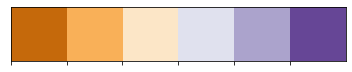

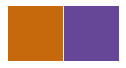

In [13]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [14]:
uniMathData.columns #columns in the dataframe

Index(['G1', 'G3'], dtype='object')

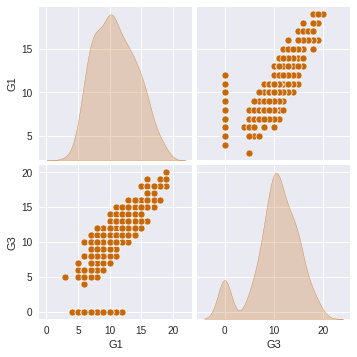

In [15]:
#pairplot for all the values

sns.pairplot(uniMathData,
             x_vars = ['G1', 'G3'],
             y_vars =  ['G1', 'G3'],
       diag_kind='kde'
             )

## Data Splits

In [17]:
#80 to 20 train-test percent split

trainDataset = uniMathData.sample(frac=0.8, random_state=0) 
testDataset = uniMathData.drop(trainDataset.index)

print(trainDataset.head(), end="\n\n\n")
print(testDataset.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16


    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [18]:
print(trainDataset.shape)
print(testDataset.shape)

(316, 2)
(79, 2)


In [20]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head(), end="\n----\n")
print(testFeatures.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
----
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [21]:
#removing the G3 column and saving it into the labels variable

trainLabels = trainFeatures.pop('G3')
testLabels = testFeatures.pop('G3')

print(trainLabels.head())
print(testLabels.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [22]:
print(trainFeatures.head())
print(testFeatures.head())

     G1
329  14
318  11
317   9
65   16
59   15
    G1
9   14
25   6
28  11
31  17
32  17


In [23]:
# univariate -> num(features) = 1
# multivariate -> num(features) > 1 = 11


model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

In [24]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    # optimizer = 'adam', #takes the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [25]:
numEpochs = 500
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/500
10/10 [==============================] - 1s 18ms/step - loss: 16.0337 - mae: 16.0337 - mse: 293.5163 - val_loss: 16.8936 - val_mae: 16.8936 - val_mse: 323.7699
Epoch 2/500
10/10 [==============================] - 0s 4ms/step - loss: 15.9157 - mae: 15.9157 - mse: 289.3727 - val_loss: 16.7692 - val_mae: 16.7692 - val_mse: 319.1940
Epoch 3/500
10/10 [==============================] - 0s 3ms/step - loss: 15.7990 - mae: 15.7990 - mse: 285.3613 - val_loss: 16.6445 - val_mae: 16.6445 - val_mse: 314.6371
Epoch 4/500
10/10 [==============================] - 0s 3ms/step - loss: 15.6808 - mae: 15.6808 - mse: 281.2692 - val_loss: 16.5202 - val_mae: 16.5202 - val_mse: 310.1298
Epoch 5/500
10/10 [==============================] - 0s 3ms/step - loss: 15.5632 - mae: 15.5632 - mse: 277.2639 - val_loss: 16.3959 - val_mae: 16.3959 - val_mse: 305.6537
Epoch 6/500
10/10 [==============================] - 0s 3ms/step - loss: 15.4463 - mae: 15.4463 - mse: 273.3075 - val_loss: 16.2710 - val_mae: 1

In [26]:
print(history)

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


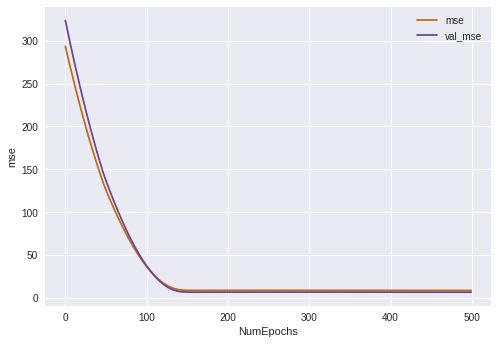

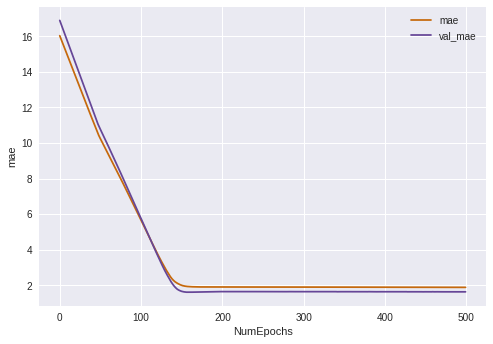

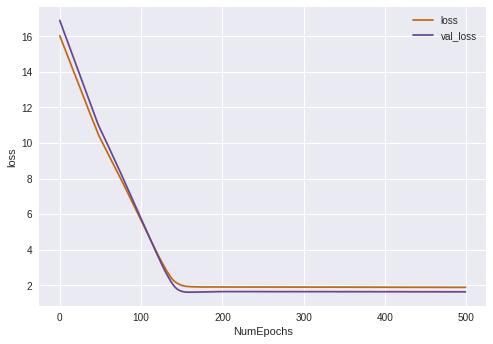

In [28]:
# tempString = 'mse'
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [29]:
model.predict([1])

array([[1.8505878]], dtype=float32)

In [30]:
# testPreds = model.predict(testFeatures).flatten() #array of all prediction values

#for single value
print(f'Prediction for input value 1: {model.predict([1])}')


# for a list of values
tempListforPreds = [1,2,3,4,5]
print(f'''

input List = {tempListforPreds}


List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[1.8505878]]


input List = [1, 2, 3, 4, 5]


List of Predictions:
[[1.8505878]
 [2.773448 ]
 [3.6963084]
 [4.6191688]
 [5.5420294]]

List of Predictions (flattened out):
[1.8505878 2.773448  3.6963084 4.6191688 5.5420294]



In [31]:
print(testFeatures)

     G1
9    14
25    6
28   11
31   17
32   17
..   ..
365  10
367   7
379  10
381   7
393  11

[79 rows x 1 columns]


In [32]:
testPreds = model.predict(testFeatures).flatten() #array of all prediction values

In [33]:
print(len(testPreds))
print(testPreds)

79
[13.847773   6.4648895 11.079191  16.616352  16.616352  12.002051
 13.847773  18.462072  18.462072   8.31061   13.847773  12.9249115
  8.31061    7.3877497  9.233471  12.9249115 11.079191  15.693493
  7.3877497 10.156331  14.770633  12.9249115 13.847773  15.693493
  7.3877497  7.3877497  8.31061   10.156331  12.002051  10.156331
 12.002051  12.9249115 10.156331   6.4648895  9.233471  12.002051
  7.3877497  8.31061   13.847773   9.233471   9.233471   7.3877497
 12.002051   6.4648895 12.9249115  7.3877497  7.3877497 11.079191
 12.9249115 16.616352  12.002051  14.770633   9.233471  12.002051
 14.770633  12.002051  14.770633  12.002051  14.770633  11.079191
 12.002051   8.31061   15.693493   7.3877497 15.693493  11.079191
 15.693493  12.9249115  8.31061    8.31061   12.002051  17.539213
 12.9249115 15.693493  10.156331   7.3877497 10.156331   7.3877497
 11.079191 ]


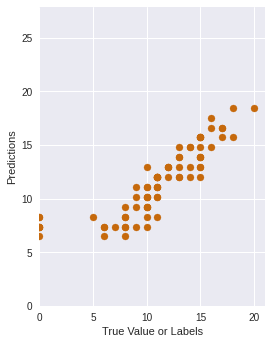

In [35]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

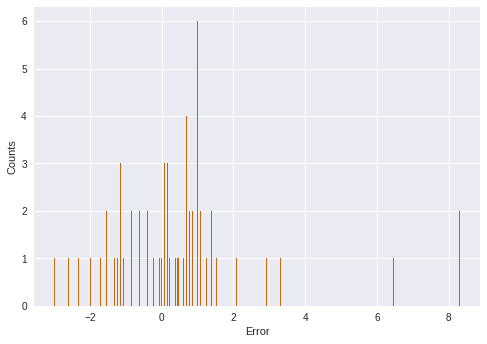

In [36]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)

Note: 


Validation loss `val_loss` is a metric that tells us how much deviation from the actual label can we expect in the predicted label

To optimize your predicitons -->

- Hyperparameter tuning --> `numEpochs`, `optimizer`, `learning_rate`, `lossFunctions`

In [37]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.SGD(0.01), #learning rate specified as 0.01
    # optimizer = SGD
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [38]:
numEpochs = 500
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/500
10/10 [==============================] - 0s 17ms/step - loss: 1.8801 - mae: 1.8801 - mse: 8.6144 - val_loss: 1.6055 - val_mae: 1.6055 - val_mse: 6.4604
Epoch 2/500
10/10 [==============================] - 0s 3ms/step - loss: 1.9094 - mae: 1.9094 - mse: 8.7231 - val_loss: 1.5947 - val_mae: 1.5947 - val_mse: 6.4027
Epoch 3/500
10/10 [==============================] - 0s 4ms/step - loss: 1.8935 - mae: 1.8935 - mse: 8.6726 - val_loss: 1.6103 - val_mae: 1.6103 - val_mse: 6.4807
Epoch 4/500
10/10 [==============================] - 0s 3ms/step - loss: 1.9156 - mae: 1.9156 - mse: 8.6827 - val_loss: 1.6146 - val_mae: 1.6146 - val_mse: 6.4953
Epoch 5/500
10/10 [==============================] - 0s 3ms/step - loss: 1.9042 - mae: 1.9042 - mse: 8.6959 - val_loss: 1.6466 - val_mae: 1.6466 - val_mse: 6.6272
Epoch 6/500
10/10 [==============================] - 0s 3ms/step - loss: 1.8894 - mae: 1.8894 - mse: 8.5756 - val_loss: 1.6448 - val_mae: 1.6448 - val_mse: 6.6188
Epoch 7/500
10/10 [==

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


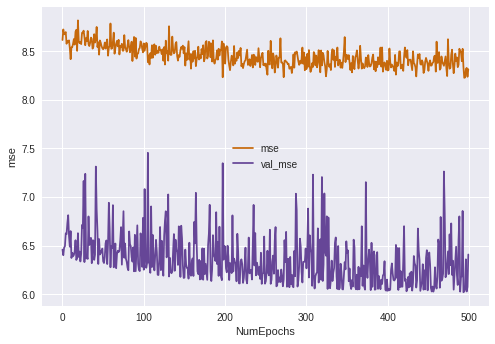

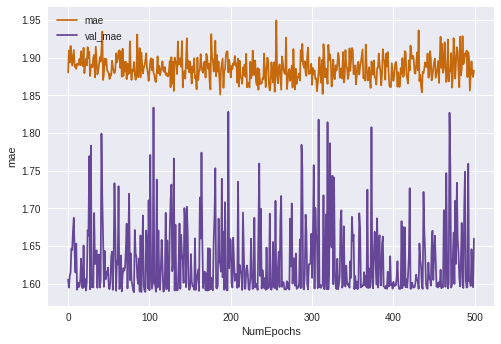

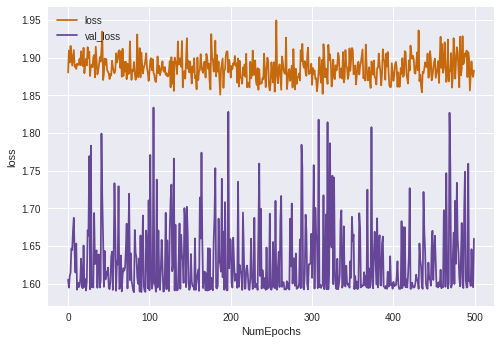

In [40]:
# tempString = 'mse'
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [41]:
model.predict([1])

array([[1.1676862]], dtype=float32)

In [42]:
# testPreds = model.predict(testFeatures).flatten() #array of all prediction values

#for single values
print(f'Prediction for input value 1: {model.predict([1])}')


# for a list of values
tempListforPreds = [1,2,3,4,5]
print(f'''

input List = {tempListforPreds}


List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[1.1676862]]


input List = [1, 2, 3, 4, 5]


List of Predictions:
[[1.1676862]
 [2.1696985]
 [3.1717107]
 [4.173723 ]
 [5.1757355]]

List of Predictions (flattened out):
[1.1676862 2.1696985 3.1717107 4.173723  5.1757355]



In [43]:
print(testFeatures)

     G1
9    14
25    6
28   11
31   17
32   17
..   ..
365  10
367   7
379  10
381   7
393  11

[79 rows x 1 columns]


In [44]:
testPreds = model.predict(testFeatures).flatten() #array of all prediction values

In [45]:
print(len(testPreds))
print(testPreds)

79
[14.193846   6.1777477 11.187809  17.199883  17.199883  12.189821
 14.193846  19.203907  19.203907   8.181772  14.193846  13.1918335
  8.181772   7.17976    9.1837845 13.1918335 11.187809  16.19787
  7.17976   10.185797  15.195858  13.1918335 14.193846  16.19787
  7.17976    7.17976    8.181772  10.185797  12.189821  10.185797
 12.189821  13.1918335 10.185797   6.1777477  9.1837845 12.189821
  7.17976    8.181772  14.193846   9.1837845  9.1837845  7.17976
 12.189821   6.1777477 13.1918335  7.17976    7.17976   11.187809
 13.1918335 17.199883  12.189821  15.195858   9.1837845 12.189821
 15.195858  12.189821  15.195858  12.189821  15.195858  11.187809
 12.189821   8.181772  16.19787    7.17976   16.19787   11.187809
 16.19787   13.1918335  8.181772   8.181772  12.189821  18.201895
 13.1918335 16.19787   10.185797   7.17976   10.185797   7.17976
 11.187809 ]


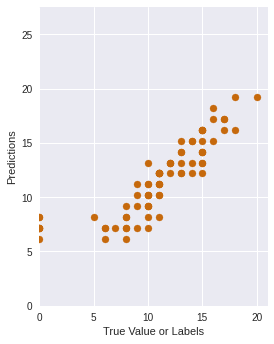

In [46]:
# prediciton plot 

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

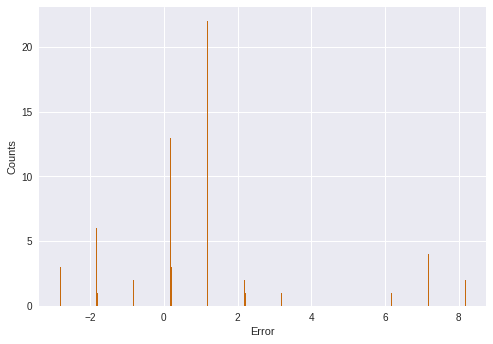

In [47]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)